In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../dataset/train/train.csv')

In [3]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [4]:
train_df.describe()

,id
count,32470.000000
mean,16234.500000
std,9373.425957
min,0.000000
25%,8117.250000
50%,16234.500000
75%,24351.750000
max,32469.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [6]:
import re

train_df['object_entity']
def get_type(sentence):
    result = re.search(r"'type':\s*'(\w+)'", sentence)
    
    return result.group(1)

get_type("{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}")

'ORG'

In [7]:
train_df['object_entity'].apply(get_type).unique()

array(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'], dtype=object)

In [8]:
train_df['object_type'] = train_df['object_entity'].apply(get_type)
train_df

,id,sentence,subject_entity,object_entity,label,source,object_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT
...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,LOC
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia,PER
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree,PER
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,ORG


In [9]:
train_df['subject_entity'].apply(get_type).unique()

array(['ORG', 'PER'], dtype=object)

In [10]:
train_df['subject_type'] = train_df['subject_entity'].apply(get_type)
train_df

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG
...,...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,LOC,PER
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia,PER,PER
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree,PER,ORG
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,ORG,ORG


In [11]:
group = train_df.groupby('label').size().reset_index(name='count')
group

,label,count
0,no_relation,9534
1,org:alternate_names,1320
2,org:dissolved,66
3,org:founded,450
4,org:founded_by,155
5,org:member_of,1866
6,org:members,420
7,org:number_of_employees/members,48
8,org:place_of_headquarters,1195
9,org:political/religious_affiliation,98


Text(0.5, 0.98, 'Distribution of Label')

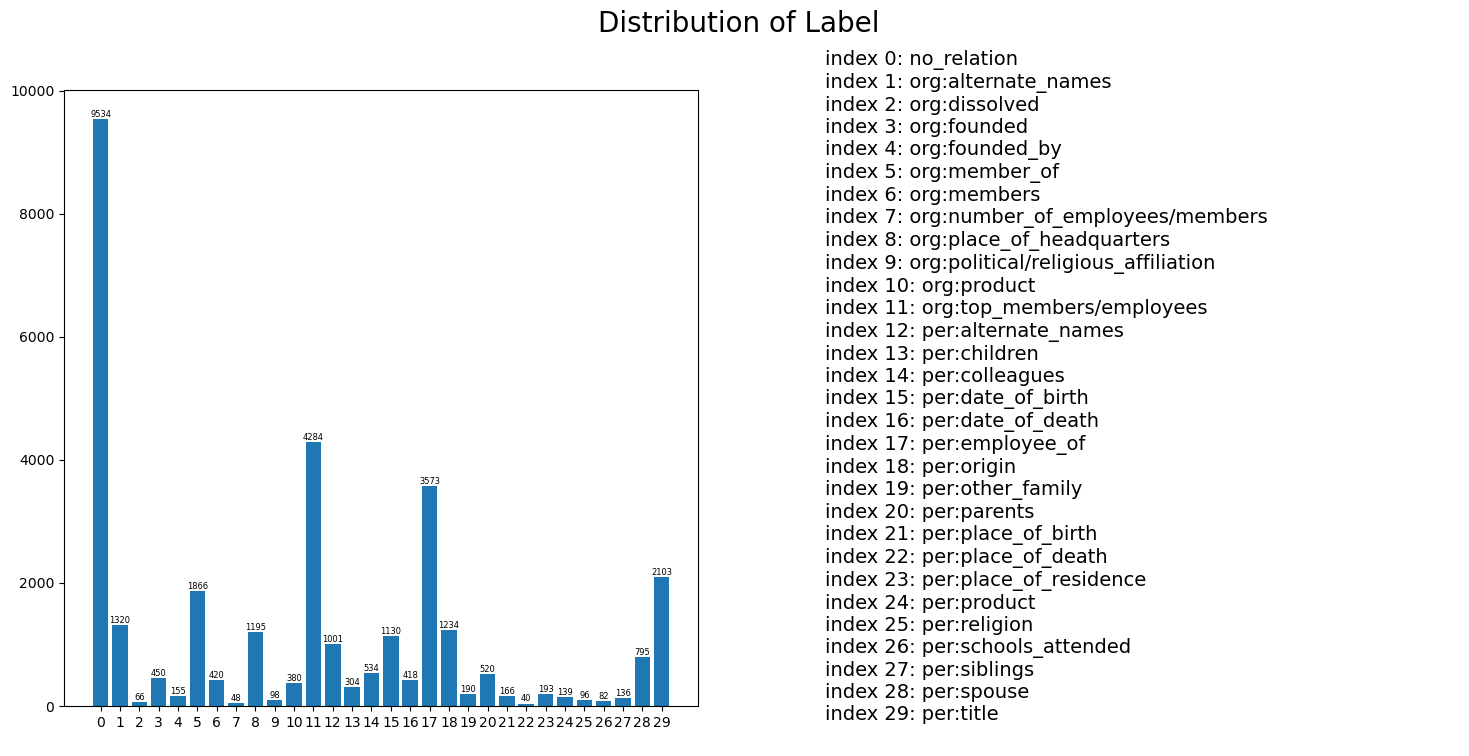

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
rects = ax[0].bar(group.index, group['count'])

ax[0].set_xticks(group.index)

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2., height + 1, f"{group['count'][i]}",
            ha='center', va='bottom', fontsize=6)
    
text = ""
for i, ele in enumerate(group['label']):
    text += f"index {i}: {ele}\n"

ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].text(0, 0.5, text, va='center', fontsize=14)

plt.suptitle("Distribution of Label", fontsize=20)

위의 결과를 보았을 때, label의 데이터가 불균함을 알 수 있다. 특히, no_relation이 다른 라벨보다 훨씬 많음을 알 수 있다.

In [13]:
total_sum = group.iloc[1:, group.columns.get_loc('count')].sum()
total_sum

22936

In [14]:
index_0 = group['count'][0]
index_0

9534

Text(0.5, 1.0, 'compare index_0 with rest')

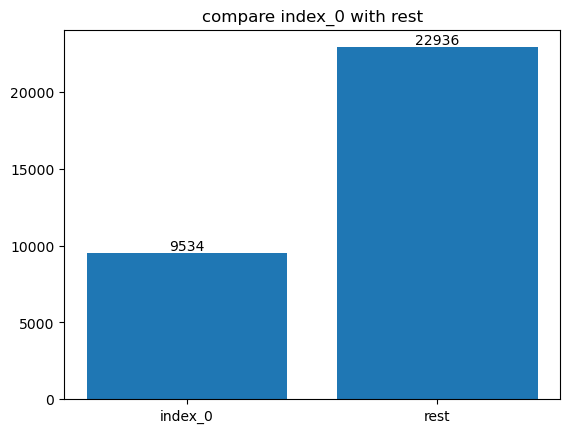

In [15]:
y = [index_0, total_sum]

rects = plt.bar(['index_0', 'rest'], y)

for i, rect in enumerate(rects):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 1, f"{y[i]}",
            ha='center', va='bottom', fontsize=10)
    
plt.title("compare index_0 with rest")

index_0와 그 외의 것들을 모두 합한 rest의 수를 보았을 때 2배 차이가 남을 알 수 있다. 따라서 index_0와 rest를 구분하는 것에 대한 모델을 구축을 하기 위해서는 DA(Data Augmentation) 또는 Oversampling이 필요해 보인다

In [16]:
group2 = train_df.groupby('object_type').size().reset_index(name='count')
group2

,object_type,count
0,DAT,4249
1,LOC,3561
2,NOH,413
3,ORG,9346
4,PER,9788
5,POH,5113


In [17]:
NOH_df = train_df[train_df['object_type'] == 'NOH']['object_entity']
NOH_df

72       {'word': '49만 5,000명', 'start_idx': 46, 'end_i...
107      {'word': '031-909-9000', 'start_idx': 43, 'end...
109      {'word': '48kg', 'start_idx': 14, 'end_idx': 1...
192      {'word': '18팀', 'start_idx': 44, 'end_idx': 46...
194      {'word': '500만', 'start_idx': 87, 'end_idx': 9...
                               ...                        
32303    {'word': '홋카이도 제1구', 'start_idx': 28, 'end_idx...
32329    {'word': '13개', 'start_idx': 14, 'end_idx': 16...
32356    {'word': '12개', 'start_idx': 61, 'end_idx': 63...
32448    {'word': '14개', 'start_idx': 3, 'end_idx': 5, ...
32457    {'word': '1100대', 'start_idx': 61, 'end_idx': ...
Name: object_entity, Length: 413, dtype: object

In [18]:
POH_df = train_df[train_df['object_type'] == 'POH'][['object_entity']]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
POH_df

,object_entity
11,"{'word': '싱어송라이터', 'start_idx': 53, 'end_idx': 58, 'type': 'POH'}"
24,"{'word': '1루수', 'start_idx': 23, 'end_idx': 25, 'type': 'POH'}"
30,"{'word': 'Voice of America', 'start_idx': 73, 'end_idx': 88, 'type': 'POH'}"
38,"{'word': '국악인', 'start_idx': 70, 'end_idx': 72, 'type': 'POH'}"
41,"{'word': '만화가', 'start_idx': 16, 'end_idx': 18, 'type': 'POH'}"
48,"{'word': '작곡가', 'start_idx': 127, 'end_idx': 129, 'type': 'POH'}"
50,"{'word': '공화제', 'start_idx': 32, 'end_idx': 34, 'type': 'POH'}"
52,"{'word': '외야수', 'start_idx': 20, 'end_idx': 22, 'type': 'POH'}"
57,"{'word': '대변인', 'start_idx': 22, 'end_idx': 24, 'type': 'POH'}"
58,"{'word': '뮤지컬 배우', 'start_idx': 4, 'end_idx': 9, 'type': 'POH'}"


In [19]:
POH_df = train_df[train_df['object_type'] == 'POH'][['object_entity']]

def get_word(sentence):
    result = re.search(r"'word': '(.+?)'", sentence)
    if result == None:
        #print(sentence)
        result = re.search(r"'word': \"(.+)\"", sentence)
    return result.group(1)

print(get_word("{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}"))
POH_df['POH'] = POH_df['object_entity'].apply(get_word)
POH_df['POH']

한국프로축구연맹


11                                          싱어송라이터
24                                             1루수
30                                Voice of America
38                                             국악인
41                                             만화가
48                                             작곡가
50                                             공화제
52                                             외야수
57                                             대변인
58                                          뮤지컬 배우
69                                            낭만주의
70                                             반도체
71                                             골키퍼
76                                           무원대장군
83                                             진도개
84                                            영화감독
92                                             드러머
100                                            1루수
101                                            캐나다
105                            

Text(0.5, 0.98, 'Distribution of Object type')

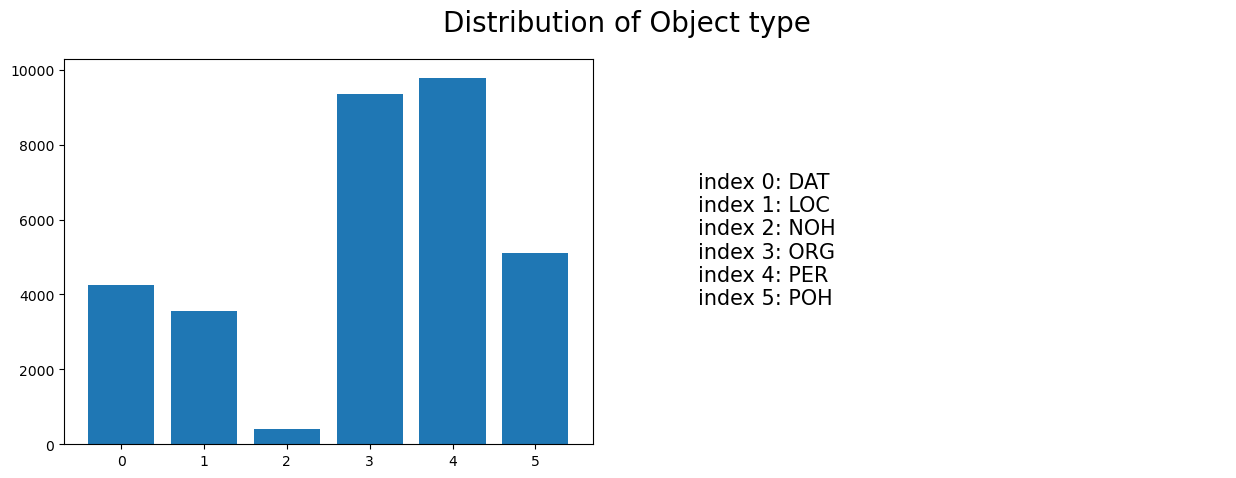

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(group2.index, group2['count'])

text = ""
for i, ele in enumerate(group2['object_type']):
    text += f"index {i}: {ele}\n"

ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].text(0, 0.5, text, va='center', fontsize=15)

plt.suptitle("Distribution of Object type", fontsize=20)

In [21]:
group3 = train_df.groupby('subject_type').size().reset_index(name='count')
group3

,subject_type,count
0,ORG,15684
1,PER,16786


Text(0.5, 0.98, 'Distribution of Subject type')

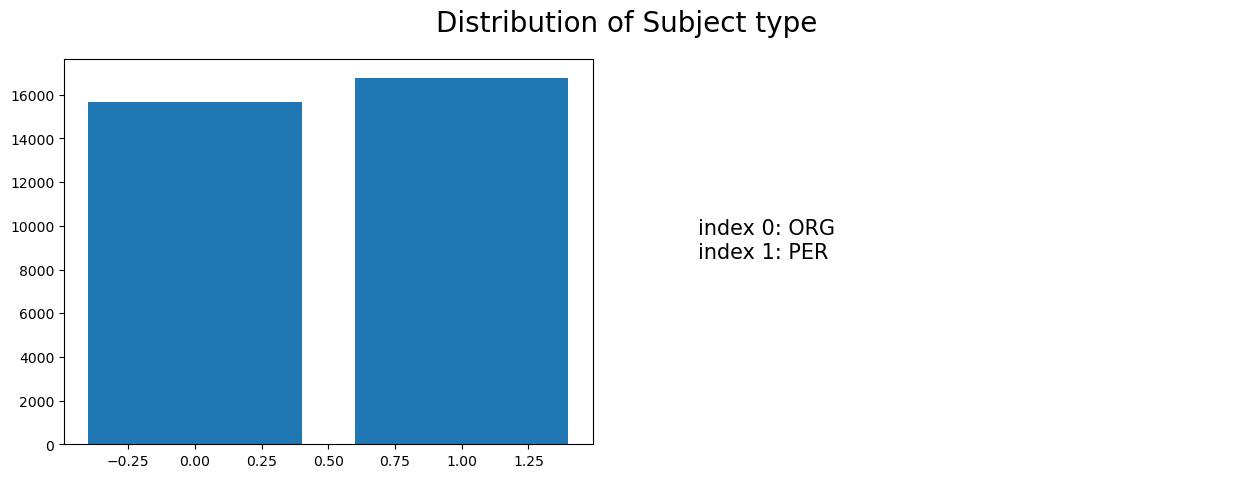

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(group3.index, group3['count'])

text = ""
for i, ele in enumerate(group3['subject_type']):
    text += f"index {i}: {ele}\n"

ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].text(0, 0.5, text, va='center', fontsize=15)

plt.suptitle("Distribution of Subject type", fontsize=20)

In [23]:
group4 = train_df.groupby(['subject_type', 'object_type']).size().reset_index(name='count')
group4

,subject_type,object_type,count
0,ORG,DAT,2110
1,ORG,LOC,1776
2,ORG,NOH,260
3,ORG,ORG,5100
4,ORG,PER,4779
5,ORG,POH,1659
6,PER,DAT,2139
7,PER,LOC,1785
8,PER,NOH,153
9,PER,ORG,4246


Text(0.5, 0.98, 'Distribution of (Subject_type, Object_type)')

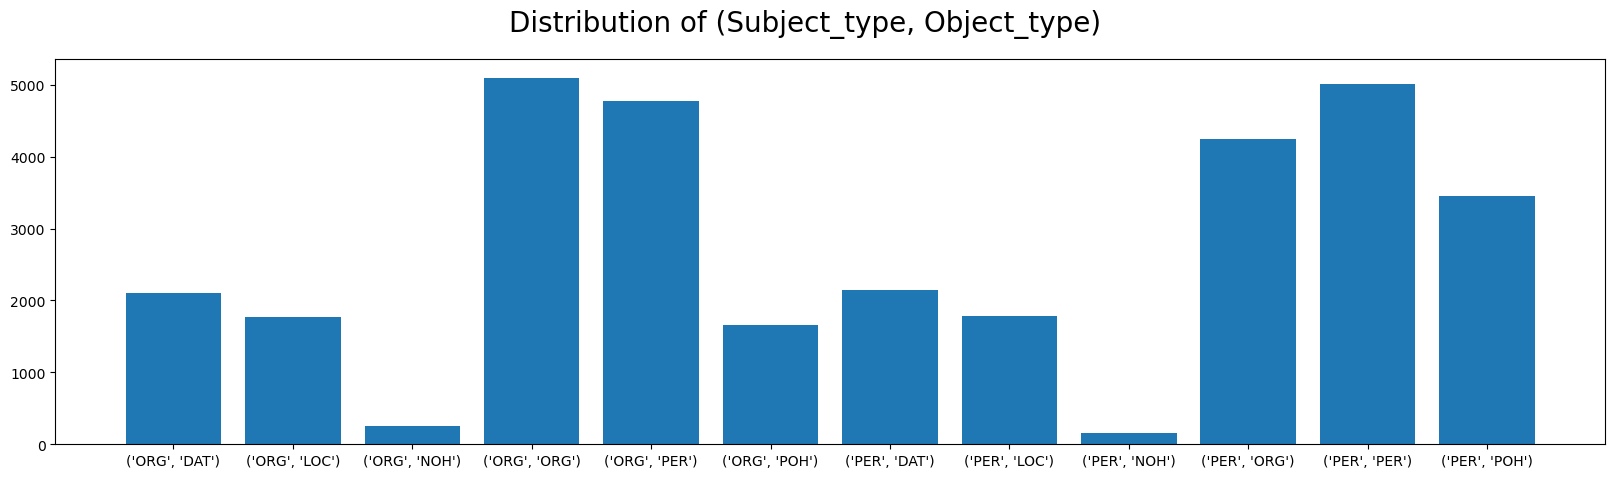

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

zips = list(zip(group4['subject_type'], group4['object_type']))

ax.bar(group4.index, group4['count'])
ax.set_xticks(group4.index)
ax.set_xticklabels(zips)
#ax.tick_params(axis='x', labelrotation=270)

text = ""
for i, ele in enumerate(group4['subject_type']):
    text += f"index {i}: {ele}\n"

plt.suptitle("Distribution of (Subject_type, Object_type)", fontsize=20)

In [42]:
group5 = train_df.groupby(['subject_type', 'object_type', 'label']).size().reset_index(name='count')
group5

,subject_type,object_type,label,count
0,ORG,DAT,no_relation,1582
1,ORG,DAT,org:alternate_names,1
2,ORG,DAT,org:dissolved,66
3,ORG,DAT,org:founded,450
4,ORG,DAT,org:member_of,5
...,...,...,...,...
135,PER,POH,per:product,120
136,PER,POH,per:religion,14
137,PER,POH,per:siblings,23
138,PER,POH,per:spouse,26


('ORG', 'DAT', 'no_relation')
('ORG', 'DAT', 'org:alternate_names')
('ORG', 'DAT', 'org:dissolved')
('ORG', 'DAT', 'org:founded')
('ORG', 'DAT', 'org:member_of')
('ORG', 'DAT', 'org:members')
('ORG', 'DAT', 'org:place_of_headquarters')
('ORG', 'DAT', 'org:political/religious_affiliation')
('ORG', 'LOC', 'no_relation')
('ORG', 'LOC', 'org:alternate_names')
('ORG', 'LOC', 'org:member_of')
('ORG', 'LOC', 'org:members')
('ORG', 'LOC', 'org:place_of_headquarters')
('ORG', 'LOC', 'org:political/religious_affiliation')
('ORG', 'LOC', 'org:product')
('ORG', 'LOC', 'org:top_members/employees')
('ORG', 'NOH', 'no_relation')
('ORG', 'NOH', 'org:alternate_names')
('ORG', 'NOH', 'org:member_of')
('ORG', 'NOH', 'org:members')
('ORG', 'NOH', 'org:number_of_employees/members')
('ORG', 'NOH', 'org:place_of_headquarters')
('ORG', 'NOH', 'org:product')
('ORG', 'NOH', 'org:top_members/employees')
('ORG', 'ORG', 'no_relation')
('ORG', 'ORG', 'org:alternate_names')
('ORG', 'ORG', 'org:founded_by')
('ORG', '

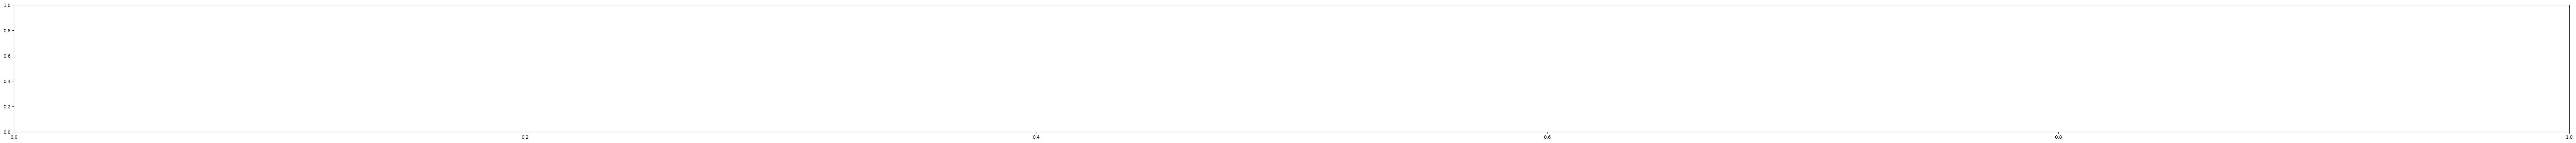

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(100, 5))

zips = list(zip(group5['subject_type'], group5['object_type'], group5['label']))
zips = sorted(list(set(zips)))
for ele in zips:
    print(ele)
# ax.bar(group5.index, group5['count'])
# ax.set_xticks(group5.index)
# ax.set_xticklabels(zips)
# #ax.tick_params(axis='x', labelrotation=270)

# text = ""
# for i, ele in enumerate(group4['subject_type']):
#     text += f"index {i}: {ele}\n"

# plt.suptitle("Distribution of (Subject_type, Object_type)", fontsize=20)

# Input Data의 형식 비교

기존 train.py를 보게 되면 train.csv 파일에 있는 subject_entity와 object_entity 열로부터 word를 추출하게 된다. 이때 그 방식은 다음과 같다.

In [25]:
def get_word_base(sentence):
    result = sentence[1:-1].split(',')[0].split(':')[1]
    
    return result

이 경우 적용시켜 보면 결과는 다음과 같다.

In [26]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

filtered_train_df = train_df[['subject_entity', 'object_entity']]
filtered_train_df['obj_word_base'] = filtered_train_df['object_entity'].apply(lambda x: get_word_base(x))
filtered_train_df

/tmp/ipykernel_3726/1874982159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df['obj_word_base'] = filtered_train_df['object_entity'].apply(lambda x: get_word_base(x))


,subject_entity,object_entity,obj_word_base
0,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",'조지 해리슨'
1,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",'대안신당'
2,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",'한국프로축구연맹'
3,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",'박정부'
4,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",'1967'
...,...,...,...
32465,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95, 'type': 'PER'}","{'word': '부산 서구·동구', 'start_idx': 100, 'end_idx': 107, 'type': 'LOC'}",'부산 서구·동구'
32466,"{'word': '최시형', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}","{'word': '손병희', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}",'손병희'
32467,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}",'신우철'
32468,"{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9, 'type': 'ORG'}","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': 25, 'type': 'ORG'}",'중앙홀딩스'


In [39]:
def get_word_new(sentence):
    result = re.search(r"'word': '(.+?)'", sentence)
    if result == None:
        result = re.search(r"'word': \"(.+?)\"", sentence)
    result = result.group(1).strip("\"")
    match = re.search(r"\B'\b|\b'\B", result[:-1])
    if match:
        pass
    else:
        result = result.strip("'")
    #result = "'" + result + "'"
    return result

In [40]:
filtered_train_df['obj_word_new'] = filtered_train_df['object_entity'].apply(lambda x: get_word_new(x))
filtered_train_df

/tmp/ipykernel_3726/1545607563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df['obj_word_new'] = filtered_train_df['object_entity'].apply(lambda x: get_word_new(x))


,subject_entity,object_entity,obj_word_base,obj_word_new
0,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",'조지 해리슨',조지 해리슨
1,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",'대안신당',대안신당
2,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",'한국프로축구연맹',한국프로축구연맹
3,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",'박정부',박정부
4,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",'1967',1967
...,...,...,...,...
32465,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95, 'type': 'PER'}","{'word': '부산 서구·동구', 'start_idx': 100, 'end_idx': 107, 'type': 'LOC'}",'부산 서구·동구',부산 서구·동구
32466,"{'word': '최시형', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}","{'word': '손병희', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}",'손병희',손병희
32467,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}",'신우철',신우철
32468,"{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9, 'type': 'ORG'}","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': 25, 'type': 'ORG'}",'중앙홀딩스',중앙홀딩스


이제 obj_word_base와 obj_word_new의 차이점을 확인해본다.

In [31]:
filtered_train_df[filtered_train_df['obj_word_base'] != filtered_train_df['obj_word_new']]

,subject_entity,object_entity,obj_word_base,obj_word_new
0,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",'조지 해리슨','조지 해리슨'
1,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",'대안신당','대안신당'
2,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",'한국프로축구연맹','한국프로축구연맹'
3,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",'박정부','박정부'
4,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",'1967','1967'
...,...,...,...,...
32465,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95, 'type': 'PER'}","{'word': '부산 서구·동구', 'start_idx': 100, 'end_idx': 107, 'type': 'LOC'}",'부산 서구·동구','부산 서구·동구'
32466,"{'word': '최시형', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}","{'word': '손병희', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}",'손병희','손병희'
32467,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}",'신우철','신우철'
32468,"{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9, 'type': 'ORG'}","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': 25, 'type': 'ORG'}",'중앙홀딩스','중앙홀딩스'


위의 결과를 보면 분명 같은데 다르다고 나온다. 이는 obj_word_base가 실은 공백 + 'word' 형태이기 때문이다. 공백을 제거하기 위해 get_word_base를 수정한다.

In [32]:
def get_word_base_modified(sentence):
    result = sentence[1:-1].split(',')[0].split(':')[1][1:]
    
    return result

다시 적용해본다

In [33]:
filtered_train_df['obj_word_base'] = filtered_train_df['object_entity'].apply(lambda x: get_word_base_modified(x))
filtered_train_df

/tmp/ipykernel_3726/2695247880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df['obj_word_base'] = filtered_train_df['object_entity'].apply(lambda x: get_word_base_modified(x))


,subject_entity,object_entity,obj_word_base,obj_word_new
0,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",'조지 해리슨','조지 해리슨'
1,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",'대안신당','대안신당'
2,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",'한국프로축구연맹','한국프로축구연맹'
3,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",'박정부','박정부'
4,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",'1967','1967'
...,...,...,...,...
32465,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95, 'type': 'PER'}","{'word': '부산 서구·동구', 'start_idx': 100, 'end_idx': 107, 'type': 'LOC'}",'부산 서구·동구','부산 서구·동구'
32466,"{'word': '최시형', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}","{'word': '손병희', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}",'손병희','손병희'
32467,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}",'신우철','신우철'
32468,"{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9, 'type': 'ORG'}","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': 25, 'type': 'ORG'}",'중앙홀딩스','중앙홀딩스'


다시 차이를 확인해본다

In [34]:
filtered_train_df[filtered_train_df['obj_word_base'] != filtered_train_df['obj_word_new']]

,subject_entity,object_entity,obj_word_base,obj_word_new
72,"{'word': '독일 연방군', 'start_idx': 6, 'end_idx': 11, 'type': 'ORG'}","{'word': '49만 5,000명', 'start_idx': 46, 'end_idx': 55, 'type': 'NOH'}",'49만 5,"'49만 5,000명'"
261,"{'word': '러시아군', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}","{'word': '25,000', 'start_idx': 10, 'end_idx': 15, 'type': 'NOH'}",'25,"'25,000'"
342,"{'word': '소련군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '37,000명', 'start_idx': 29, 'end_idx': 35, 'type': 'NOH'}",'37,"'37,000명'"
440,"{'word': '스페인', 'start_idx': 31, 'end_idx': 33, 'type': 'ORG'}","{'word': '6,000명', 'start_idx': 48, 'end_idx': 53, 'type': 'NOH'}",'6,"'6,000명'"
444,"{'word': '로버트 팰컨 스콧', 'start_idx': 0, 'end_idx': 8, 'type': 'PER'}","{'word': '군인, 탐험가', 'start_idx': 69, 'end_idx': 75, 'type': 'POH'}",'군인,"'군인, 탐험가'"
...,...,...,...,...
30642,"{'word': '민해경', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '가수, 텔레비전 연기자, 뮤지컬 배우', 'start_idx': 22, 'end_idx': 41, 'type': 'POH'}",'가수,"'가수, 텔레비전 연기자, 뮤지컬 배우'"
31513,"{'word': '소련군', 'start_idx': 35, 'end_idx': 37, 'type': 'ORG'}","{'word': '150,000명', 'start_idx': 39, 'end_idx': 46, 'type': 'NOH'}",'150,"'150,000명'"
31921,"{'word': '토드 하워드', 'start_idx': 0, 'end_idx': 5, 'type': 'PER'}","{'word': '비디오게임 디자이너, 감독, 프로듀서', 'start_idx': 25, 'end_idx': 44, 'type': 'POH'}",'비디오게임 디자이너,"'비디오게임 디자이너, 감독, 프로듀서'"
32124,"{'word': '클로이 베넷', 'start_idx': 0, 'end_idx': 5, 'type': 'PER'}","{'word': '배우, 가수', 'start_idx': 28, 'end_idx': 33, 'type': 'POH'}",'배우,"'배우, 가수'"


위의 결과를 보면 기존의 방법은 ','에 대한 예외처리를 하지 못하기 때문에 데이터가 온전하지 못한 것을 볼 수 있다. 따라서 get_word_new에서는 '' 또는 "" 사이에 있는 내용만 추출하도록 한다. 이때, "word" 또는 시동'과 같이 양 끝이나 한쪽 끝에 불필요한 따옴표가 들어가 있어 이걸 제외하였다. 또한 영화 '뮤지컬'과 같이 안쪽에 ''처리가 된 것은 보존되도록 하였다.

수정된 내용을 적용하여 epoch: 5로 학습한 결과 베이스 코드에서의 학습 결과로 얻었던 f1 score 63.5193에서 66.1567 약 2.5점 향상을 얻을 수 있었다.
auprc의 경우 68.6823에서 64.8575으로 약 4점 정도 떨어졌다.

In [41]:
#filtered_train_df['obj_word_new'].to_csv('csv.csv')